In [24]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
# data['location'], encoded_locations = pd.factorize(data['final_cc_cname_DI'])
# data['gender'], encoded_gender = pd.factorize(data['gender'])
# encoded_gender = list(encoded_gender)
# data['education'], encoded_education = pd.factorize(data['LoE_DI'])
# encoded_education = ['n/A'] + list(encoded_education)
# data['start_year'] = pd.to_numeric(data['start_time_DI'].str.slice(0, 4), errors='coerce')
# data['age'] = data['start_year'] - data['YoB']
# data = data[data['age'] > 15]
# data['age_group'], encoded_age_groups = pd.factorize(pd.cut(data['age'], [16, 25, 45, 120]).astype(str))
# encoded_age_groups = list(encoded_age_groups)

data['location'] = data['final_cc_cname_DI']
data['education'] = data['LoE_DI']
data['start_year'] = pd.to_numeric(data['start_time_DI'].str.slice(0, 4), errors='coerce')
data['age'] = data['start_year'] - data['YoB']
data = data[data['age'] > 15]
data['age_group'] = pd.cut(data['age'], [16, 25, 45, 120]).astype(str)
# encoded_age_groups = list(encoded_age_groups)
dataset = data[['course_id', 'location', 'gender', 'education', 'age_group', 'viewed', 'certified', 'explored']]

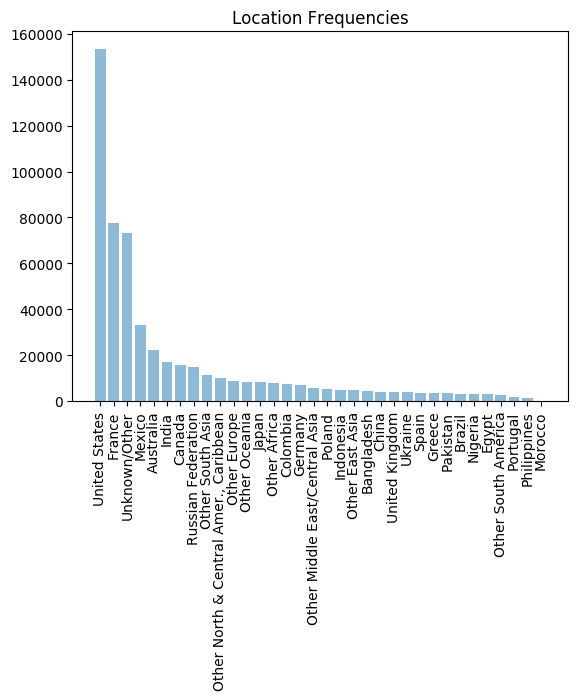

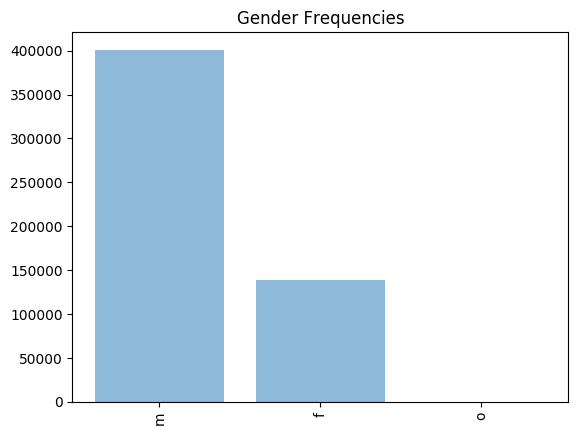

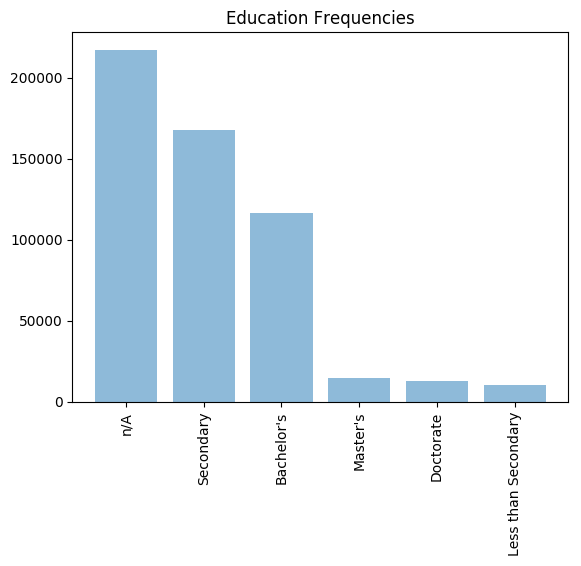

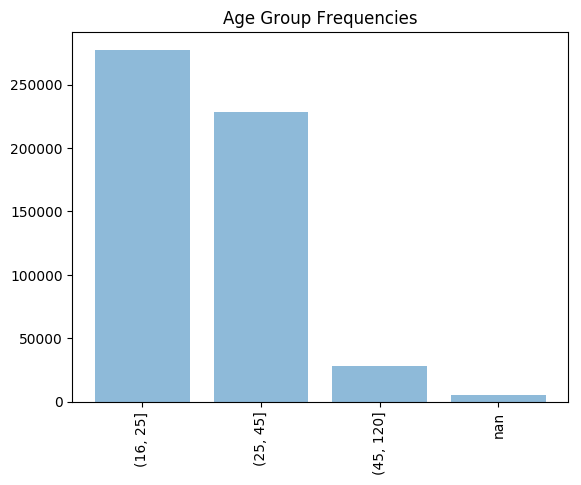

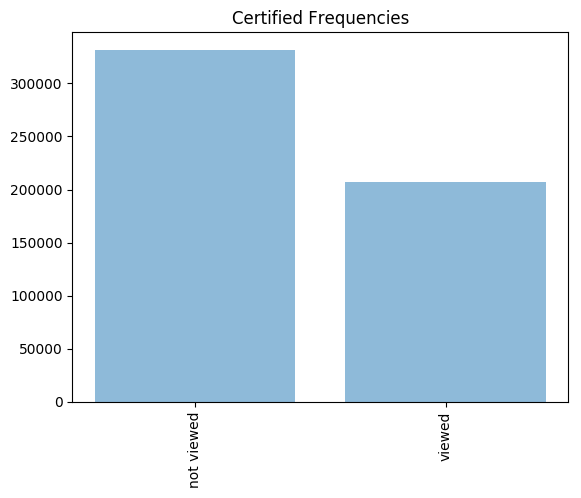

In [2]:
def plot_bar_chart(labels, values, title):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(rotation=90)
    plt.xticks(y_pos, labels)
    plt.title(title)
    plt.show()
plot_bar_chart(encoded_locations, dataset['location'].value_counts(), 'Location Frequencies')
plot_bar_chart(encoded_gender, dataset['gender'].value_counts(), 'Gender Frequencies')
plot_bar_chart(encoded_education, dataset['education'].value_counts(), 'Education Frequencies')
plot_bar_chart(encoded_age_groups, dataset['age_group'].value_counts(), 'Age Group Frequencies')
plot_bar_chart(['not viewed', 'viewed'], dataset['viewed'].value_counts(), 'Certified Frequencies')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


x = dataset[['course_id', 'location', 'gender', 'education', 'age_group']]
y = dataset[['viewed', 'certified']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# enc = OneHotEncoder(handle_unknown='ignore')
# x_train +=1
# x_test +=1
# enc.fit(x_train)
# x_train = enc.transform(x_train)
# x_test = enc.transform(x_test)

In [25]:
import json

file = open('d.json', 'w')
file.write(dataset.to_json(orient='records'))
file.close()
# num_combs = len(encoded_locations) * len(encoded_gender) * len(encoded_education) * len(encoded_age_groups)
# print(num_combs)
# d = {}
# input_col_names = ['location','gender','education','age_group']
# output_col_names = ['viewed', 'certified']
# for i, row in x.iterrows():
#     s = ' '.join([str(row[col_name]) for col_name in input_col_names])
#     course_id = row['course_id']
#     if course_id not in d:
#         d[course_id] = {}
#     for j, col_name in enumerate(output_col_names):
#         if s not in d[course_id]:
#             d[course_id][s] = [[0, 0], [0, 0]]
#         d[course_id][s][j][y[col_name][i]] += 1
        
# print(json.dumps(d))

[{"course_id":"HarvardX\/CS50x\/2012","location":"Unknown\/Other","gender":"m","education":"Secondary","age":25.0,"viewed":0,"certified":0},{"course_id":"HarvardX\/CS50x\/2012","location":"United States","gender":"f","education":"Secondary","age":44.0,"viewed":0,"certified":0},{"course_id":"HarvardX\/PH207x\/2012_Fall","location":"India","gender":"m","education":"Bachelor's","age":23.0,"viewed":0,"certified":0},{"course_id":"HarvardX\/CS50x\/2012","location":"Unknown\/Other","gender":"m","education":"Master's","age":34.0,"viewed":0,"certified":0},{"course_id":"HarvardX\/PH207x\/2012_Fall","location":"United States","gender":"m","education":"Secondary","age":19.0,"viewed":1,"certified":0},{"course_id":"HarvardX\/CS50x\/2012","location":"United States","gender":"m","education":"Bachelor's","age":24.0,"viewed":1,"certified":0},{"course_id":"HarvardX\/CS50x\/2012","location":"Greece","gender":"f","education":"Secondary","age":19.0,"viewed":0,"certified":0},{"course_id":"HarvardX\/CS50x\/20

In [ ]:
from sklearn.metrics import classification_report

def evaluate(y_true, y_pred):
    print(classification_report(y_true, y_pred))

In [ ]:
# Random baseline

np.random.seed(1)
rand_out = np.random.randint(2, size=len(y_test))
evaluate(y_test, rand_out)

In [ ]:
# Always guess viewed

out = [1] * len(y_test)
evaluate(y_test, out)

In [ ]:
# Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
out = clf.predict(x_test)
evaluate(y_test, out)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=1)
clf.fit(x_train, y_train)
out = clf.predict(x_test)
evaluate(y_test, out)